In [1]:
import tensorflow as tf

C:\Users\winuser\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
hell=tf.constant('Hello Dharmik!')

In [154]:
x=tf.constant(100)

In [155]:
x

<tf.Tensor 'Const_11:0' shape=() dtype=int32>

In [156]:
#TensorFLow Session
sess=tf.Session()

In [157]:
sess.run(hell)

b'Hello Dharmik!'

In [158]:
sess.run(x)
type(sess.run(x))

numpy.int32

In [159]:
#operations
x=tf.constant(2)

In [160]:
y=tf.constant(3)

In [161]:
with tf.Session() as sess:
    print('operation with constants')
    print('Addition:',sess.run(x+y))
    print('subtraction:',sess.run(x-y))
    print('multiplication:',sess.run(x*y))
    print('Division:',sess.run(x/y))

operation with constants
Addition: 5
subtraction: -1
multiplication: 6
Division: 0.6666666666666666


In [162]:
x=tf.placeholder(tf.int32)

In [163]:
y=tf.placeholder(tf.int32)

In [164]:
add=tf.add(x,y)
sub=tf.subtract(x,y)
mul=tf.multiply(x,y)
d={x:20,y:30}

In [165]:
with tf.Session() as sess:
    print('operations with placeholders')
    print('addition:',sess.run(add,feed_dict={x:20,y:30}))
    print('subtraction:',sess.run(sub,feed_dict=d))
    print('multiplication:',sess.run(mul,feed_dict=d))

operations with placeholders
addition: 50
subtraction: -10
multiplication: 600


In [166]:
import numpy as np

In [167]:
a=np.array([[5.0,5.0]])

In [168]:
b=np.array([[2.0],[2.0]])

In [169]:
mat1=tf.constant(a)
mat2=tf.constant(b)

In [170]:
mat_mul=tf.matmul(mat1,mat2)

In [171]:
with tf.Session() as sess:
    result =sess.run(mat_mul)
    print(result)

[[20.]]


# MNIST DATA


In [173]:
from tensorflow.examples.tutorials.mnist import input_data


In [174]:
mnist=input_data.read_data_sets("/tmp/data",one_hot=True)

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


In [175]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [176]:
mnist.train.images.shape

(55000, 784)

In [177]:
sample=mnist.train.images[22].reshape(28,28)

In [178]:
import matplotlib.pyplot as plt
%matplotlib inline

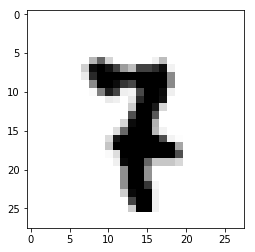

In [179]:
plt.imshow(sample,cmap="Greys")

In [180]:
# lower the learning rate higher the optimised result
learning_rate=0.001
#how many training cycle we go through
training_epochs=25
# size of batches of training data
batch_size=100

In [212]:
n_classes=10 #images of number from 0-9
n_samples=mnist.train.num_examples

In [182]:
#input layer
n_input=784

In [183]:
#hidden layer one common val to use with image data is 256 that bcz of the way the computer store img information
n_hidden_1=256
n_hidden_2=256

In [184]:
 def multilayer_perceptron(x,weights,biases):
    '''
     x:Placeholder for data Input
     weights: Dict of weights
     biases :Dict of bias value
     '''
     #First Hidden Layer with RELU Activation
    # X * W + B
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    
    #RELU(X *W + B) = RELU -> f(x)=max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    #Second Hidden Layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    #Last Output Layer
    out_layer = tf.matmul(layer_2,weights['out'])+biases['out']
    return out_layer

In [185]:
#just outputs random value from normal distribution
tf.random_normal

<function tensorflow.python.ops.random_ops.random_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)>

In [186]:
weights={
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [187]:
biases={
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [188]:
x=tf.placeholder('float',[None,n_input])

In [189]:
y=tf.placeholder('float',[None,n_classes])

In [190]:
pred =multilayer_perceptron(x,weights,biases)

In [191]:
#cost function & optimisation fucntion
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

## Training the Model</b>

In [192]:
t=mnist.train.next_batch(1)

In [193]:
xsamp,ysamp=t

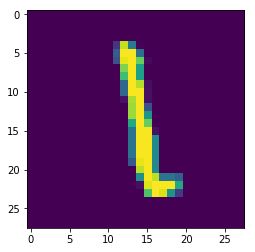

In [194]:
plt.imshow(xsamp.reshape(28,28))

## RUN THE SESSION

In [195]:
sess=tf.InteractiveSession()

C:\Users\winuser\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\client\session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [196]:
init = tf.initialize_all_variables()

In [197]:
sess.run(init)

In [198]:
# 15 loops
for epoch in range(training_epochs):
    
    #cost
    avg_cost=0.0
    
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        
        # while doing tuple unpacking if you dont want any value put '_' in that place
        _,c=sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        
        avg_cost += c/total_batch
        
    print('Epoch:{} cost{:.4f}'.format(epoch+1,avg_cost))
    
print("model has completed {} Epoch of training".format(training_epochs))

Epoch:1 cost157.5323
Epoch:2 cost36.6643
Epoch:3 cost23.1337
Epoch:4 cost16.2042
Epoch:5 cost11.8317
Epoch:6 cost8.6977
Epoch:7 cost6.5604
Epoch:8 cost4.9148
Epoch:9 cost3.6476
Epoch:10 cost2.8333
Epoch:11 cost2.0923
Epoch:12 cost1.5719
Epoch:13 cost1.1367
Epoch:14 cost0.9827
Epoch:15 cost0.7730
Epoch:16 cost0.6643
Epoch:17 cost0.5059
Epoch:18 cost0.4396
Epoch:19 cost0.4461
Epoch:20 cost0.4248
Epoch:21 cost0.3797
Epoch:22 cost0.3109
Epoch:23 cost0.3872
Epoch:24 cost0.3276
Epoch:25 cost0.3004
model has completed 25 Epoch of training


## Model Evaluations

In [209]:
correct_prediction=tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [200]:
print(correct_prediction[0])


Tensor("strided_slice_2:0", shape=(), dtype=bool)


In [201]:
correct_prediction=tf.cast(correct_prediction,'float')

In [202]:
print(correct_prediction[0])

Tensor("strided_slice_3:0", shape=(), dtype=float32)


In [203]:
accuracy=tf.reduce_mean(correct_prediction)

In [204]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [205]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [206]:
#mnist.test.images[0]

In [208]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.9494